# Práctica Guiada de Laboratorio 5 - Curso IA 2025-1 Sección 1 EPISW
# Implementación de técnicas de Machine Learning - Regresión lineal
### Prof. Rolando A. Maguiña Pérez

# Introducción
En la presente Práctica, a realizarse el 01 de Mayo del 2025,  se abordará, a manera de ejemplo, el problema denominado “Predicción de precios de casa”; se intentará resolverlo mediante la técnica de  `Machine Learning` llamada `Regresión lineal`. Luego de la presentación del problema, se entrenará su respectivo algoritmo para "aprender a predecir" precios de casas; enseguida, se evaluará el modelo obtenido sobre un conjunto de datos de validación, obteniéndose las métricas de evaluación para elaborar nuestro modelo predictivo.

En esas actividades se usará la biblioteca de aprendizaje automático para el lenguaje de programación Python llamada  [scikit-learn](https://scikit-learn.org/stable/).

Posteriormente, se deberá resolver el ejercicio propuesto sobre regresión lineal (PGL5_IA_2025-1_EPISW_RegresionLineal- EjercicioPropuesto .ipynb). En dicho documento están consignadas las instrucciones para el envío de la solución respectiva.

## Síntesis de las actividades a desarrollar en esta práctica
* Instalación de la biblioteca llamada `scikit-learn`.
* Creación de un modelo (basado en el algoritmo de regresión lineal) mediante el `scikit-learn`.
* Entrenamiento del modelo.
* Validación del modelo.
* Evaluación del modelo.
* Resolución del ejercicio propuesto

# Objetivos
Los objetivos de esta Práctica son:
- Conocer la biblioteca de aprendizaje automático llamada `scikit-learn`.
- Conocer la implementación de la técnica de Machine Learning llamada regresión lineal con `scikit-learn`.
- Aprender las etapas del procesamiento de una data: entrenamiento/validación.
- Obtener el mejor modelo que resuelva el problema planteado.


# scikit-learn
## Introducción al scikit-learn
[scikit-learn](https://scikit-learn.org/stable/) es una de las herramientas computacionales más populares y usadas en Machine Learning. Incluye algoritmos para abordar problemas de clasificación, regresión y clustering; asimismo, para otras tareas relacionadas, tales como, reducción de dimensionalidad, preprocesamiento del dataset, entre otras.

Para esta Práctica se deberá instalar previamente, para luego ser usada en la resolución de un ejercicio.

## Instalación del scikit-learn
Instalar el scikit-learn siguiendo lo indicado en [Installing the latest release](https://scikit-learn.org/stable/install.html#install-official-release).

Se puede usar el sistema de gestión de paquetes llamado `pip` o el `conda`. Se recomienda usar el segundo de los nombrados.

# Regresión Lineal con Python

Su vecina es una agente de bienes raíces y quiere ayuda para predecir los precios de las viviendas en las regiones de EE.UU. Sería interesante si de alguna manera se pudiera crear un modelo para ella que le permitiera ingresando algunas características de una casa y le devolviese un estimado del precio de la  la casa que se vendería.

Habiéndose enterado de sus nuevas habilidades de aprendizaje automático, ella le ha preguntado si podría ayudarla. ¡Usted acepta y decide que la Regresión lineal podría ser un buen camino para resolver este problema!

Luego, su vecina le brinda información sobre un grupo de casas en regiones de los Estados Unidos, la cual está contenida en su totalidad en el conjunto de datos: USA_Housing.csv.

Los datos contienen las siguientes columnas:

* `Avg. Area Income`: Promedio de ingresos de los residentes de la ciudad donde la casa está ubicada.
* `Avg. Area House Age`: Promedio de edad de las casas en la misma ciudad
* `Avg. Area Number of Rooms`: Promedio del Número de ambientes de las casas en la misma ciudad
* `Avg. Area Number of Bedrooms`: Promedio del número de dormitorios para las casas en la misma ciudad
* `Area Population`: Población de la ciudad en la que la casa esta ubicada
* `Price`: Precio en la que la casa se vendió
* `Address`: Dirección de la casa

## Revisemos los datos
Hemos podido obtener algunos datos de los precios de vivienda como un conjunto de csv, ¡preparemos nuestro entorno con las bibliotecas que necesitaremos y luego importemos los datos!

### Importación de bibliotecas

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Revisemos los datos

In [13]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [14]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [15]:
USAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [16]:
USAhousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [17]:
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Análisis de Datos Exploratorio

¡Creamos algunos gráficos simples para verificar los datos! El método  `seaborn.pairplot()` se utiliza para visualizar las relaciones entre múltiples variables en un conjunto de datos, en este caso, el  `USAhousing`. Crear una cuadrícula de diagramas de dispersión, nos ayuda a identificar cómo interactúan las diferentes características o variables para identificar patrones, correlaciones y tendencias en los datos; para este datset se consideran todas las variables.

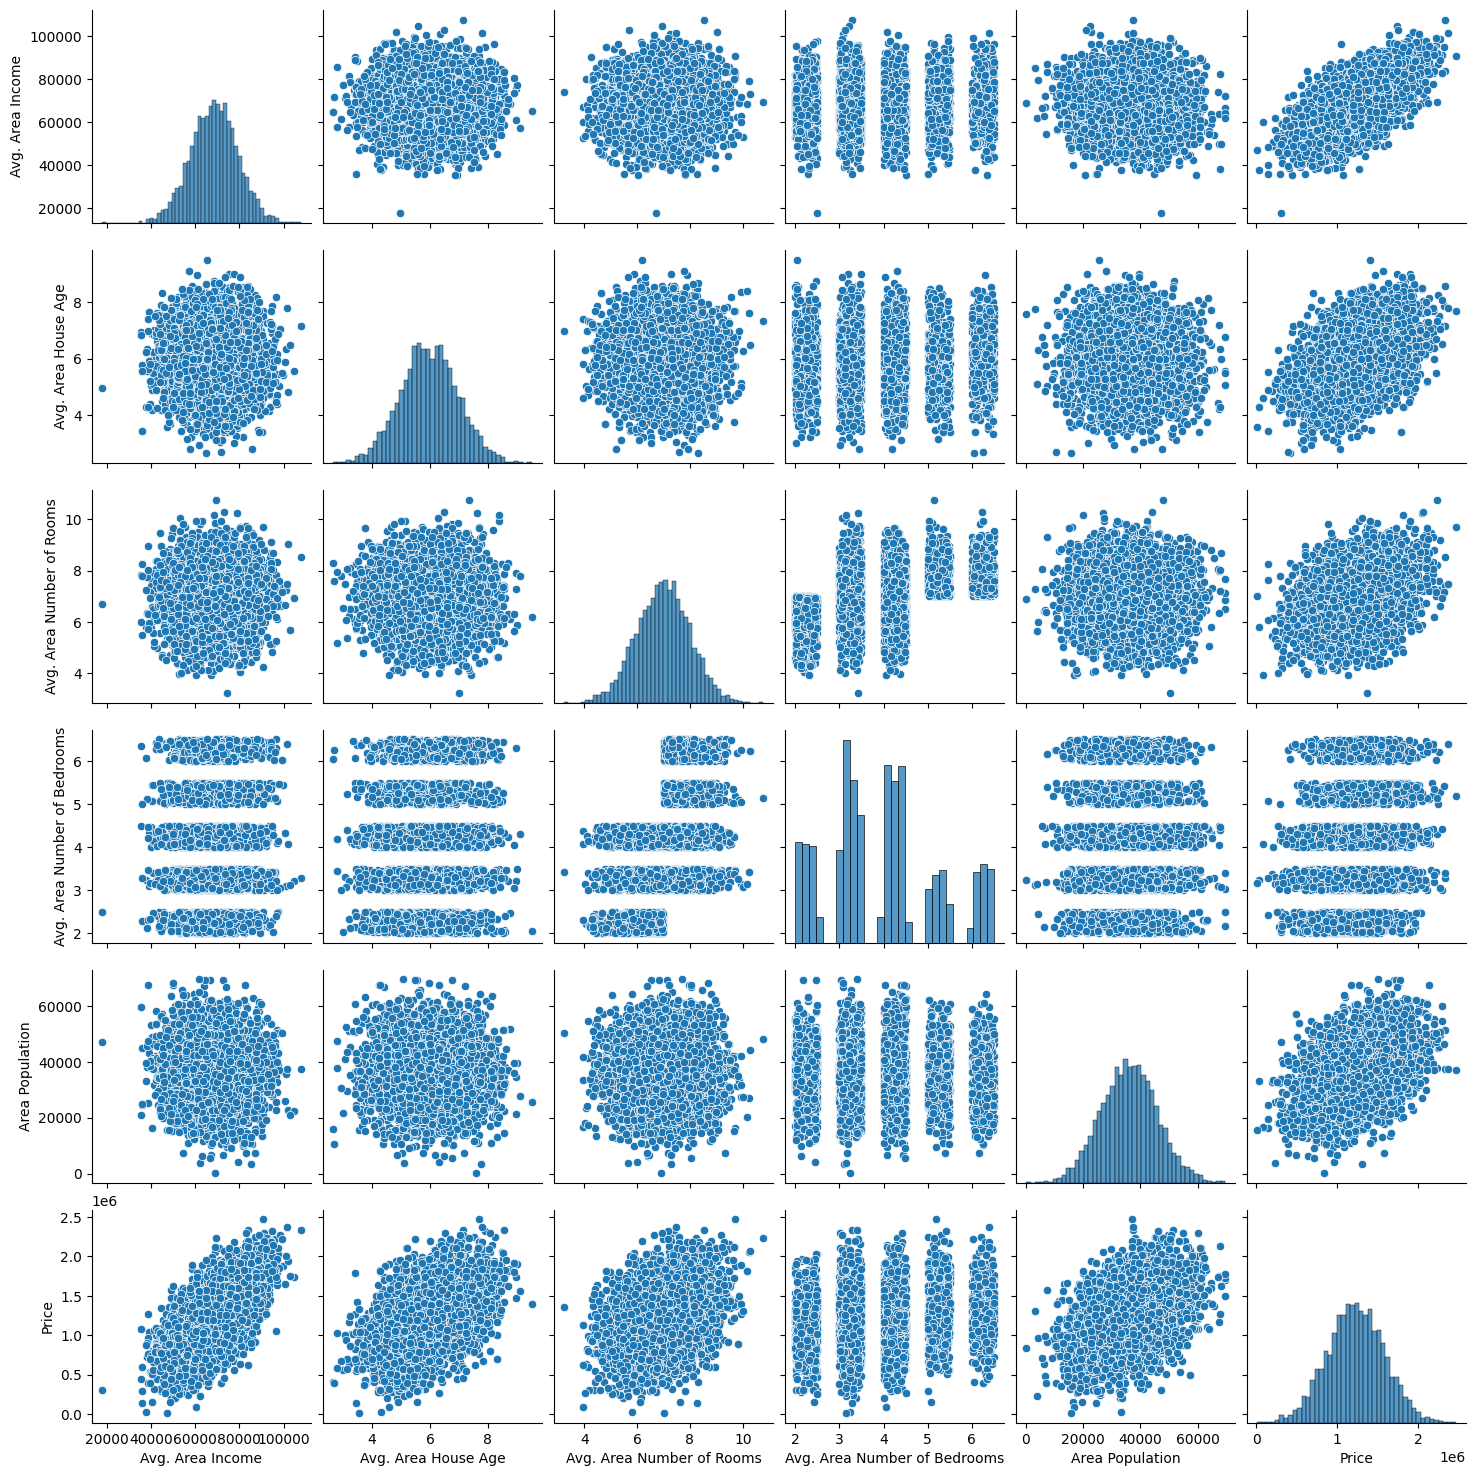

In [18]:
sns.pairplot(USAhousing)

C:\Users\eduda\AppData\Local\Temp\ipykernel_26792\812483608.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(USAhousing['Price'])


<Axes: xlabel='Price', ylabel='Density'>

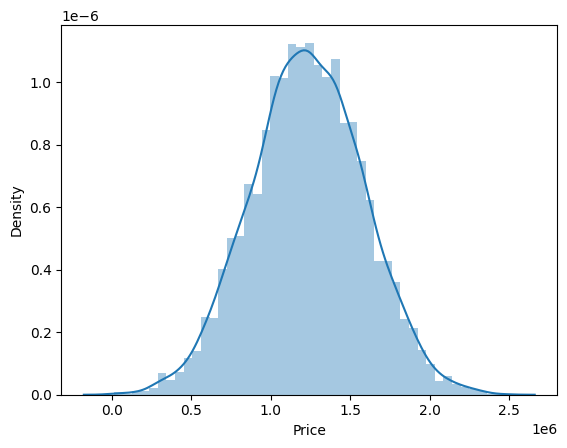

In [19]:
sns.distplot(USAhousing['Price'])

In [20]:
sns.heatmap(USAhousing.corr())

ValueError: could not convert string to float: '208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101'

## Entrenando el Modelo de Regresión Lineal

Vamos ahora a entrenar el modelo de regresión lineal. Tendremos que dividir primero nuestros datos en un arreglo `X` que contenga las características para entrenar, y un arreglo `y` con la variable objetivo, en este caso la columna `Price` Precio. Descartamos la columna 'Address' porque solo tiene información de texto que el modelo de regresión lineal no puede usar.

### Arreglos X e y

In [24]:
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

## Dividir datos de entrenamiento y prueba

Ahora dividamos los datos en un conjunto de entrenamiento y un conjunto de prueba. Formaremos un modelo en el conjunto de entrenamiento y luego usaremos el conjunto de prueba para evaluar el modelo.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Crear y Entrenar el Modelo

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

## Evaluación del Modelo

Evaluemos el modelo comprobando sus coeficientes y cómo podemos interpretarlos.

In [30]:
# imprime el interceptor
print(lm.intercept_)

-2640159.79685267


In [31]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coeficiente'])
coeff_df

,Coeficiente
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


Interpretación de los coeficientes:

- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area Income** está asociado con un **incremento de \$21.52 **.
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area House Age** está asociado con un **incremento de \$164883.28 **.
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area Number of Rooms** está asociado con un **incremento de \$122368.67 **.
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Avg. Area Number of Bedrooms** está asociado con un **incremento de \$2233.80 **.
- Manteniendo las otras características fijas, un incremento de 1 unidad en **Area Population** está asociado con un **incremento de \$15.15 **.

¿Esto tiene sentido? Probablemente no porque esta información corresponde a datos sintéticos. Si quieres datos reales para repetir este tipo de análisis, revise el dataset [boston](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html):



    from sklearn.datasets import load_boston
    boston = load_boston()
    print(boston.DESCR)
    boston_df = boston.data

## Predicciones de nuestro modelo

Aprovechemos las predicciones de nuestro conjunto de pruebas y veamos qué tan bien lo hizo.

In [32]:
predictions = lm.predict(X_test)

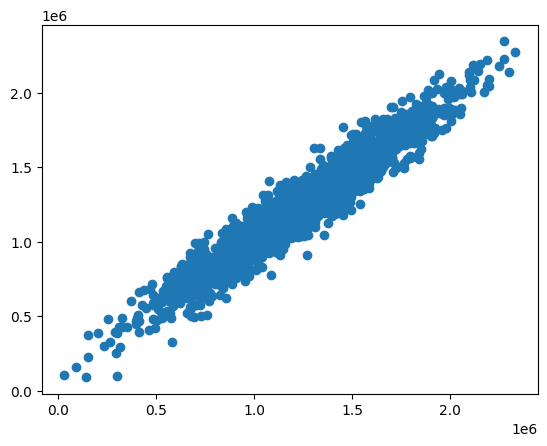

In [33]:
plt.scatter(y_test,predictions)

**Histograma residual**

C:\Users\eduda\AppData\Local\Temp\ipykernel_26792\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


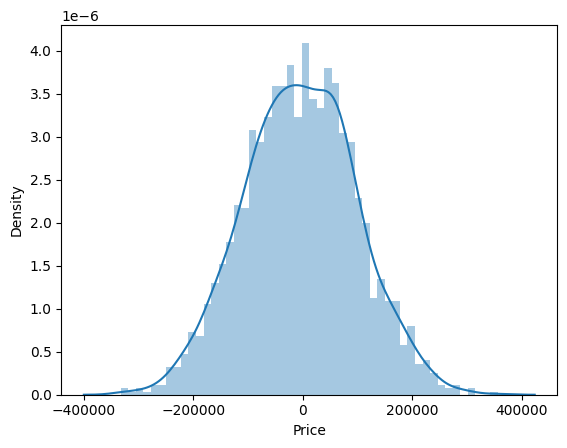

In [34]:
sns.distplot((y_test-predictions),bins=50);

## Metricas de Evaluación para Regresión

Aquí hay tres métricas de evaluación comunes para los problemas de regresión:

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) es la media de los errores al cuadrado:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparación de estas métricas:

- **MAE** es el más fácil de entender porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **RMSE** tiene la ventaja frente a su MSE que el error se devuelve en las mismas unidades de la variable que estamos prediciendo (interpretable en las unidades de "y").

Todas estas son **funciones de pérdida**, y las queremos minimizar.

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.22251914942
MSE: 10460958907.208946
RMSE: 102278.82922290881
